<a href="https://colab.research.google.com/github/MauroGianchino/Data_Science_III_Coderhouse/blob/main/Gianchino_DSIII_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Final - Data Science III : NLP & Deep Learning aplicado a Ciencia de Datos
En este **Notebook** se realiza la entrega del proyecto final del curso **Data Science III** de **Coderhouse**.

Alumno: Mauro Ariel Gianchino

Curso: 61745

Tutor: Erica Destefano

#Abstract

El objetivo del presente trabajo es aplicar una red neuronal multicapa capaz de estimar el precio de un auto usado en Australia a partir de diversas características que caractericen al automotor. Para esto, se utiliza un dataset con la información necesaria.

En primer lugar, se hace un análisis y limpieza de los datos para definir los sets de entrenamiento y prueba para el entrenamiento y validación de la red neuronal.

Finalmente, se aplica una red neuronal multicapa para resolver este problema de regresión. Luego se varian sus parámetros para analizar como es la salida por medio del error cuadratico medio.

# Acerca del dataset

El conjunto de datos proviene de Kaggle y refiero al preico de vehiculos en Australia.

https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices

Cada fila representa un auto que haya sido vendido, y el objetivo es **predecir el valor medio del auto en funcion de las características que posea** (en dólares).


#Análisis de dataset

Instalo paquetes

In [28]:
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [29]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tomo el dataset y muestro los primeros datos

In [30]:
#df= pd.read_csv("/content/drive/MyDrive/DSIII/dataset_Australian_vehicles.csv") #cargo el archivo csv
df= pd.read_csv("dataset_Australian_vehicles.csv") #cargo el archivo csv
df.head() #muestro las primeras 5 filas

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4.0,5.0,34990.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14453 entries, 0 to 14452
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14453 non-null  object 
 1   Year               14453 non-null  int64  
 2   Model              14453 non-null  object 
 3   Car/Suv            14453 non-null  object 
 4   Title              14453 non-null  object 
 5   UsedOrNew          14453 non-null  object 
 6   Transmission       14423 non-null  object 
 7   Engine             14453 non-null  object 
 8   DriveType          14453 non-null  object 
 9   FuelType           14453 non-null  object 
 10  FuelConsumption    14453 non-null  float64
 11  Kilometres         14453 non-null  float64
 12  ColourExtInt       14453 non-null  object 
 13  Location           14453 non-null  object 
 14  CylindersinEngine  14453 non-null  object 
 15  BodyType           14453 non-null  object 
 16  Doors              144

Examino cuantos autos nuevos y cuantos usados existieron para observar si hay gran diferencia en la cantidad.

In [32]:
cant_usados = df['UsedOrNew'].value_counts()
cant_usados

,count
UsedOrNew,
USED,13505
NEW,519
DEMO,429


Como hay muchos más usados, voy a usar esos autos para entrenar mi red neuronal. Eliminaré el resto del dataset.

In [33]:
df = df[df['UsedOrNew'] == 'USED']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13505 entries, 1 to 14452
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              13505 non-null  object 
 1   Year               13505 non-null  int64  
 2   Model              13505 non-null  object 
 3   Car/Suv            13505 non-null  object 
 4   Title              13505 non-null  object 
 5   UsedOrNew          13505 non-null  object 
 6   Transmission       13491 non-null  object 
 7   Engine             13505 non-null  object 
 8   DriveType          13505 non-null  object 
 9   FuelType           13505 non-null  object 
 10  FuelConsumption    13505 non-null  float64
 11  Kilometres         13505 non-null  float64
 12  ColourExtInt       13505 non-null  object 
 13  Location           13505 non-null  object 
 14  CylindersinEngine  13505 non-null  object 
 15  BodyType           13505 non-null  object 
 16  Doors              13505 no

Vemos que nos quedamos solo con los usados. Ahora voy a tomar solo las columnas que tengan datos numericos para mi dataset.

In [34]:
dn=df.select_dtypes(include=['int64','float64'])

In [35]:
dn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13505 entries, 1 to 14452
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             13505 non-null  int64  
 1   FuelConsumption  13505 non-null  float64
 2   Kilometres       13505 non-null  float64
 3   Doors            13505 non-null  float64
 4   Seats            13505 non-null  float64
 5   Price            13505 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 738.6 KB


In [76]:
dn.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,13505.0,13505.0,13505.0,13505.0,13505.0,13505.0
mean,2015.7,7.8,107059.0,4.0,5.1,33432.3
std,4.8,2.2,76112.5,0.7,1.1,28188.7
min,1978.0,0.0,1.0,2.0,2.0,900.0
25%,2013.0,6.6,50242.0,4.0,5.0,17990.0
50%,2017.0,7.6,91361.0,4.0,5.0,27930.0
75%,2019.0,8.8,152000.0,4.0,5.0,39990.0
max,2023.0,27.0,526162.0,5.0,22.0,649880.0


Vemos que la media del precio es aproximadamente 33mil dólares.

Para la red neuronal que vamos a implementar, se usarán todas las variables numéricas disponibles salvo el precio de los autos, que será la variable objetivo.

In [74]:
X = dn.drop('Price', axis=1) #variables de entrada: Año, Consumo de combustible, Kilometraje, cantidad de puertas, cantidad de asientos.
y = dn['Price'] #variable objetivo
X

,Year,FuelConsumption,Kilometres,Doors,Seats
1,2022,6.7,16.0,5.0,5.0
2,2022,6.6,8472.0,2.0,4.0
3,2011,11.0,136517.0,2.0,4.0
4,2022,6.0,1035.0,4.0,5.0
5,2017,5.1,67662.0,2.0,4.0
...,...,...,...,...,...
14446,2009,10.5,182254.0,4.0,5.0
14448,2015,6.9,54359.0,4.0,5.0
14449,2021,6.9,32977.0,4.0,5.0
14451,2016,7.2,85525.0,4.0,5.0


In [75]:
y

,Price
1,19990.0
2,108988.0
3,32990.0
4,34990.0
5,62280.0
...,...
14446,16000.0
14448,21450.0
14449,36770.0
14451,41888.0


Creo los sets de entrenamiento y de testeo.

In [38]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Aplicación de red neuronal multicapa

In [39]:
features = X_train.shape[1] #cantidad de caracteristica que tiene el dataset. Es la cantidad de columnas.

features

5

Para analizar la red neuronal y como cambia la métrica de error según sus parámetros como la cantidad de neuronas por capa, la funcion de activacion, el numero de epocas, etc. voy a crear una función llamada "ejecutar_red" que me permita elegirnos y comparar las performances.

In [103]:
def ejectuar_red_dos_capas(X_train, X_test, y_train, y_test,n1,n2,epoc,func):
  # Modelo
  model = Sequential([
        Input(shape=(features,)),  # La entrada son las features
        Dense(n1, activation=func), #primera capa de la red tiene 10 neuronas, con salida de activacion la funcion relu
        Dense(n2, activation=func), #segunda capa de la red tiene 5 neuronas, con salida de activacion la funcion relu
        Dense(1)  # unica neurona de salida, con el precio del vehiculo
    ])

  # Compilar modelo
  model.compile(optimizer='adam', loss='mse', metrics=['mae']) #uso el error cuadratico medio (mse)

  model.summary() #resumen del modelo
  # Entrenar modelo
  history = model.fit(X_train, y_train, epochs=epoc, batch_size=32, validation_split=0.2, verbose=1)
  # Predecir en el conjunto de prueba
  y_pred = model.predict(X_test_scaled)
  df_resultados = pd.DataFrame({
    'Valor real': y_test.values,
    'Predicción': y_pred.flatten()
  })

  # Mostrar las primeras filas
  print(df_resultados.head(10))
  # Gráfico de pérdida
  plt.plot(history.history['loss'], label='MSE entrenamiento')
  plt.plot(history.history['val_loss'], label='MSE validación')
  plt.title('Evolución del error cuadrático medio')
  plt.xlabel('Épocas')
  plt.ylabel('MSE')
  plt.legend()
  plt.show()
  rmse_train = np.sqrt(history.history['loss'])
  rmse_val = np.sqrt(history.history['val_loss'])
  # Gráfico de pérdida
  plt.plot(rmse_train, label='RMSE entrenamiento')
  plt.plot(rmse_val, label='RMSE validación')
  plt.title('Evolución del RMSE')
  plt.xlabel('Épocas')
  plt.ylabel('RMSE')
  plt.legend()
  plt.show()

Primero creo la red con dos capas de 5 neuronas cada una y una de salida. Usare 10 epocas y la función "relu" como función de activación.

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1526273920.0000 - mae: 27497.0645 - val_loss: 1442421888.0000 - val_mae: 25765.7500
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1452982400.0000 - mae: 25644.8633 - val_loss: 1435837184.0000 - val_mae: 25682.9531
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1455132544.0000 - mae: 25764.9727 - val_loss: 1425858176.0000 - val_mae: 25527.3145
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1262880256.0000 - mae: 24122.7910 - val_loss: 951439040.0000 - val_mae: 18328.7344
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 959010944.0000 - mae: 16764.5117 - val_loss: 670201472.0000 - val_mae: 13150.2363
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 679920320.0000 - mae: 13860.5264 - val_loss: 610893760.0000 - val_mae: 13433.3154
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 573773184.0000 - mae: 13760.0713 - val_loss: 600071488.0000 - val_mae: 13214.1621

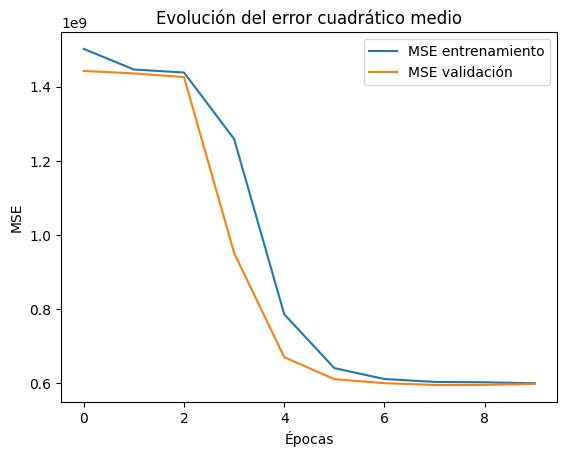

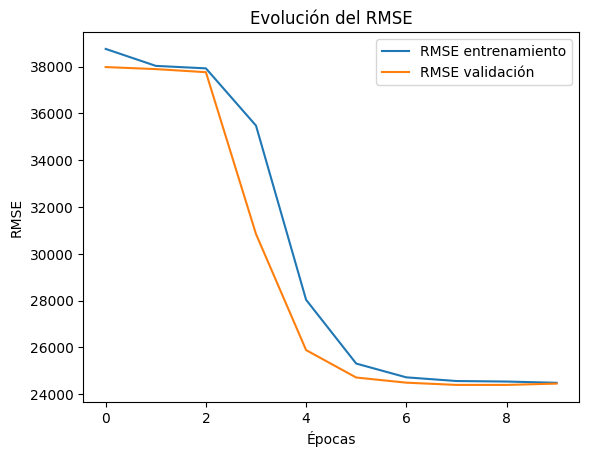

In [104]:
ejectuar_red_dos_capas(X_train, X_test, y_train, y_test,5,5,10,'relu')

Se observa que el MSE decrece con las épocas pero a partir de la 8 parece establizarse en 0.6e9. Este es un error muy alto. Para un análisis mas detallado, se grafica tambien el RMSE y se observa que se estabiliza en 24mil dólares aproximadamente. Esto representa un 72% del valor medio de los autos, lo cual es un error muy grande.

Dado que el MSE no pareciera disminuir con las épocas, para verificarlo se realiza la misma corrida pero con 30 épocas.

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1501543680.0000 - mae: 25831.2090 - val_loss: 1439019264.0000 - val_mae: 25694.1953
Epoch 2/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1404900224.0000 - mae: 25343.7695 - val_loss: 1355183616.0000 - val_mae: 24604.6309
Epoch 3/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1251328000.0000 - mae: 23824.2070 - val_loss: 1164409984.0000 - val_mae: 21924.7500
Epoch 4/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1074291712.0000 - mae: 20834.9707 - val_loss: 883382912.0000 - val_mae: 16329.8193
Epoch 5/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 822062528.0000 - mae: 16198.2646 - val_loss: 700536576.0000 - val_mae: 14237.3838
Epoch 6/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 806392960.0000 - mae: 14374.4033 - val_loss: 636139072.0000 - val_mae: 12999.9004
Epoch 7/30
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 523554496.0000 - mae: 13392.9424 - val_loss: 612446720.0000 - val_mae: 13245.6396

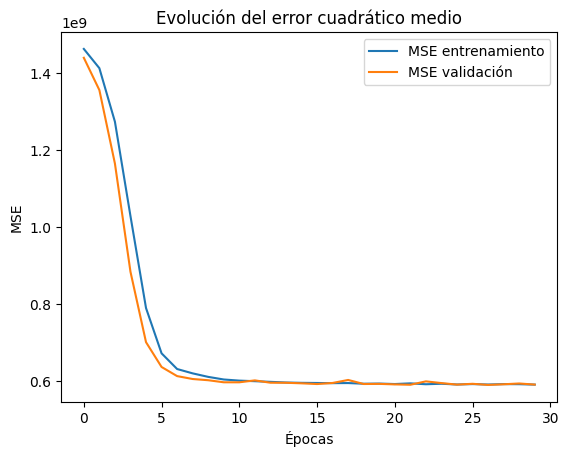

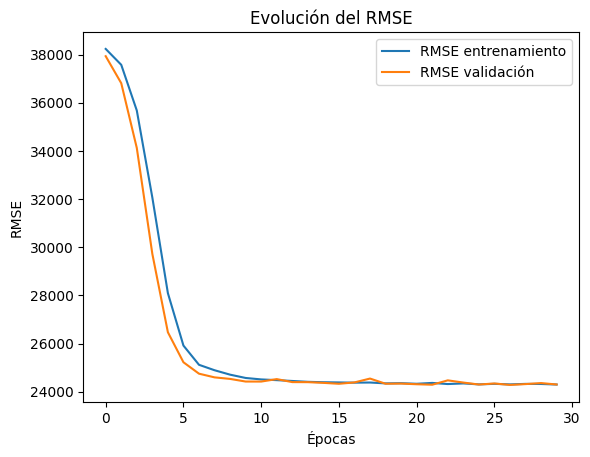

In [105]:
ejectuar_red_dos_capas(X_train, X_test, y_train, y_test,5,5,30,'relu')

Efectivamente, a partir de la época 10 el error ya no disminuye. Se procede a probar con un aumento a la cantidad de neuronas en las dos capas.

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2061782784.0000 - mae: 34976.7617 - val_loss: 1416475008.0000 - val_mae: 25322.8125
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1422630400.0000 - mae: 24581.8379 - val_loss: 1397393408.0000 - val_mae: 25246.7715
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1394540928.0000 - mae: 24938.3594 - val_loss: 1364206976.0000 - val_mae: 24585.4473
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1345747840.0000 - mae: 24331.0391 - val_loss: 1295658240.0000 - val_mae: 23682.6816
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1165779968.0000 - mae: 22651.9531 - val_loss: 1120772352.0000 - val_mae: 20789.8613
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 892950656.0000 - mae: 19247.6738 - val_loss: 900601088.0000 - val_mae: 16892.8203
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 946896832.0000 - mae: 16189.7354 - val_loss: 736542848.0000 - val_mae: 14044.8

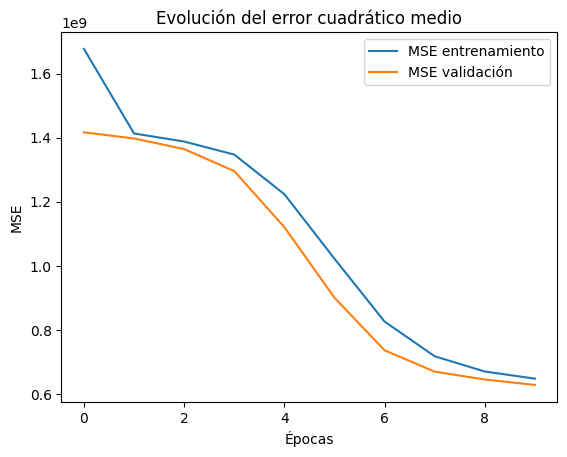

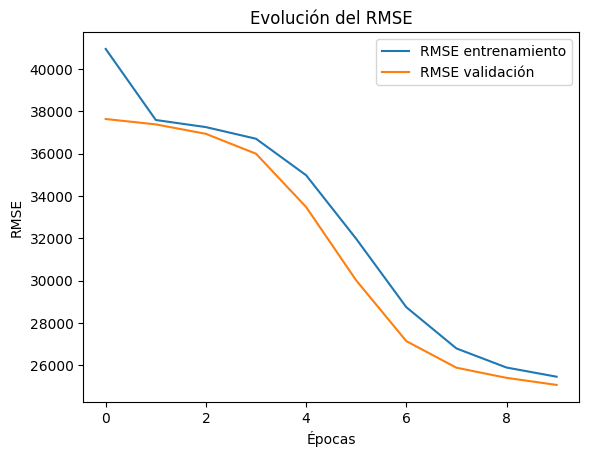

In [106]:
ejectuar_red_dos_capas(X_train, X_test, y_train, y_test,10,10,10,'relu')

El aumento de neuronas a 10 en ambas capas no mejora el modelo, por lo que ya se encuentra overfitting.

Se procede a graficar los dos modelos de redes utilizadas:

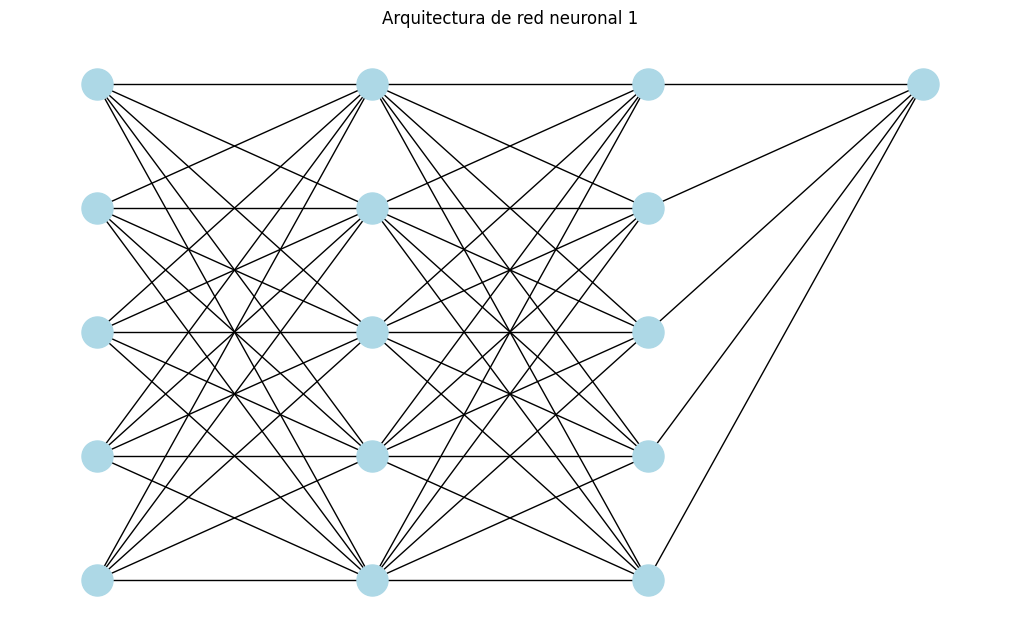

In [111]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_red(neuronas_por_capa):
    G = nx.DiGraph()
    pos = {}
    node_count = 0

    for capa_idx, num_neuronas in enumerate(neuronas_por_capa):
        for n in range(num_neuronas):
            node_id = f"C{capa_idx}_N{n}"
            G.add_node(node_id)

            pos[node_id] = (capa_idx, -n)
            if capa_idx > 0:
                for prev_n in range(neuronas_por_capa[capa_idx - 1]):
                    prev_id = f"C{capa_idx - 1}_N{prev_n}"
                    G.add_edge(prev_id, node_id)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=500, node_color='lightblue')
    plt.title("Arquitectura de red neuronal 1")
    plt.show()

dibujar_red([5, 5, 5, 1])

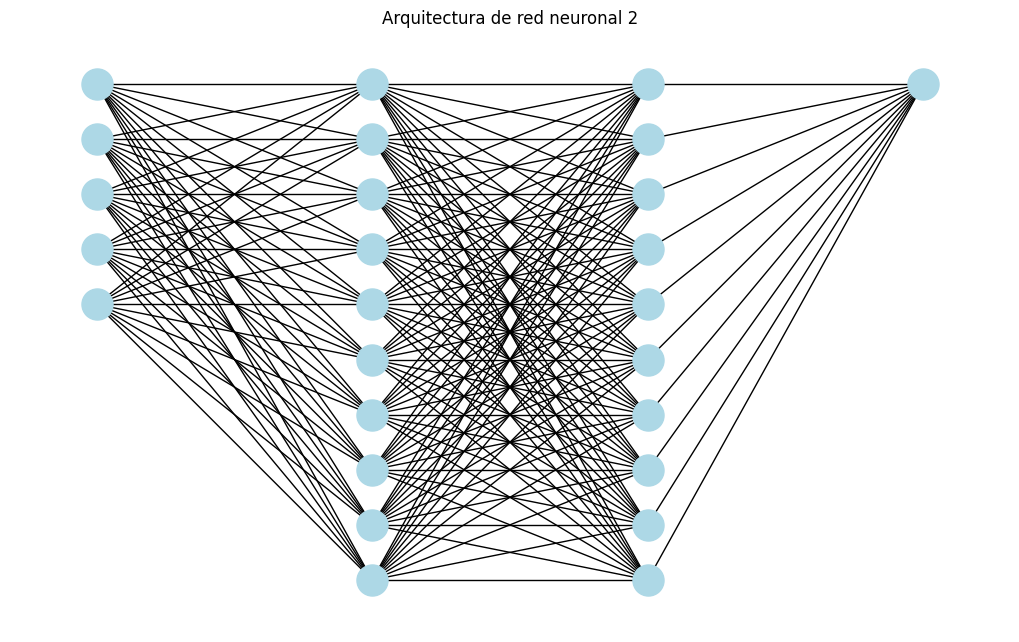

In [112]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_red(neuronas_por_capa):
    G = nx.DiGraph()
    pos = {}
    node_count = 0

    for capa_idx, num_neuronas in enumerate(neuronas_por_capa):
        for n in range(num_neuronas):
            node_id = f"C{capa_idx}_N{n}"
            G.add_node(node_id)

            pos[node_id] = (capa_idx, -n)
            if capa_idx > 0:
                for prev_n in range(neuronas_por_capa[capa_idx - 1]):
                    prev_id = f"C{capa_idx - 1}_N{prev_n}"
                    G.add_edge(prev_id, node_id)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=500, node_color='lightblue')
    plt.title("Arquitectura de red neuronal 2")
    plt.show()

dibujar_red([5, 10, 10, 1])

In [113]:
def ejectuar_red_cuatro_capas(X_train, X_test, y_train, y_test,n1,n2,n3,n4,epoc,func):
  # Modelo
  model = Sequential([
        Input(shape=(features,)),  # La entrada son las features
        Dense(n1, activation=func), #primera capa de la red tiene 10 neuronas, con salida de activacion la funcion relu
        Dense(n2, activation=func), #segunda capa de la red tiene 5 neuronas, con salida de activacion la funcion relu
        Dense(n3, activation=func), #segunda capa de la red tiene 5 neuronas, con salida de activacion la funcion relu
        Dense(n4, activation=func), #segunda capa de la red tiene 5 neuronas, con salida de activacion la funcion relu
        Dense(1)  # unica neurona de salida, con el precio del vehiculo
    ])

  # Compilar modelo
  model.compile(optimizer='adam', loss='mse', metrics=['mae']) #uso el error cuadratico medio (mse)

  model.summary() #resumen del modelo
  # Entrenar modelo
  history = model.fit(X_train, y_train, epochs=epoc, batch_size=32, validation_split=0.2, verbose=1)
  # Predecir en el conjunto de prueba
  y_pred = model.predict(X_test_scaled)
  df_resultados = pd.DataFrame({
    'Valor real': y_test.values,
    'Predicción': y_pred.flatten()
  })

  # Mostrar las primeras filas
  print(df_resultados.head(10))
  # Gráfico de pérdida
  plt.plot(history.history['loss'], label='MSE entrenamiento')
  plt.plot(history.history['val_loss'], label='MSE validación')
  plt.title('Evolución del error cuadrático medio')
  plt.xlabel('Épocas')
  plt.ylabel('MSE')
  plt.legend()
  plt.show()
  rmse_train = np.sqrt(history.history['loss'])
  rmse_val = np.sqrt(history.history['val_loss'])
  # Gráfico de pérdida
  plt.plot(rmse_train, label='RMSE entrenamiento')
  plt.plot(rmse_val, label='RMSE validación')
  plt.title('Evolución del RMSE')
  plt.xlabel('Épocas')
  plt.ylabel('RMSE')
  plt.legend()
  plt.show()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1595491200.0000 - mae: 27405.6348 - val_loss: 1428352896.0000 - val_mae: 25628.3613
Epoch 2/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1410864768.0000 - mae: 25299.4531 - val_loss: 1361163392.0000 - val_mae: 24450.0273
Epoch 3/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1296843264.0000 - mae: 23454.2734 - val_loss: 758469056.0000 - val_mae: 14002.6699
Epoch 4/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 666777920.0000 - mae: 13891.0176 - val_loss: 609863680.0000 - val_mae: 13330.8643
Epoch 5/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 696275136.0000 - mae: 14535.4990 - val_loss: 628279808.0000 - val_mae: 15679.6875
Epoch 6/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 604942016.0000 - mae: 13970.5547 - val_loss: 589341568.0000 - val_mae: 13386.8330
Epoch 7/10
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 794974976.0000 - mae: 14239.1123 - val_loss: 593058048.0000 - val_mae: 13899.1826
E

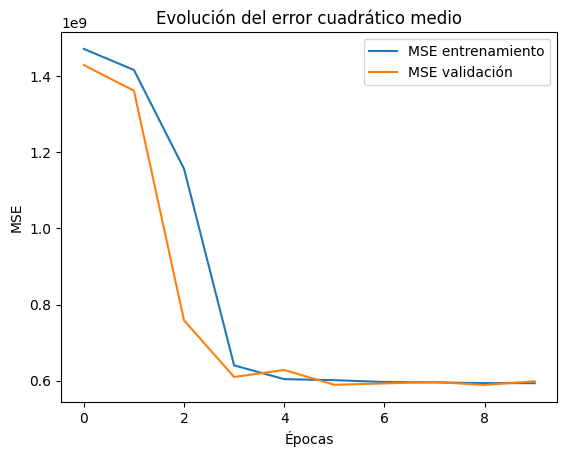

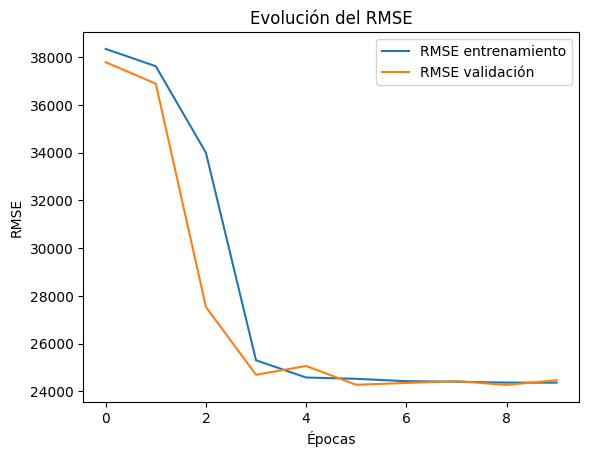

In [114]:
ejectuar_red_cuatro_capas(X_train, X_test, y_train, y_test,10,10,10,10,10,'relu')

El aumento de capas tampoco parece mejorar el entrenamiento de la red.

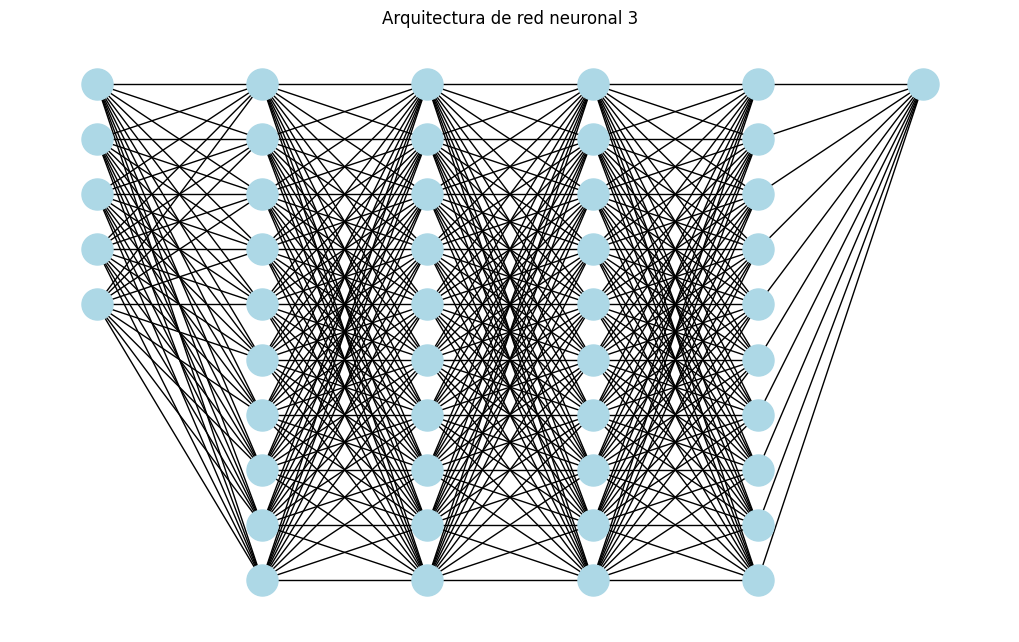

In [116]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_red(neuronas_por_capa):
    G = nx.DiGraph()
    pos = {}
    node_count = 0

    for capa_idx, num_neuronas in enumerate(neuronas_por_capa):
        for n in range(num_neuronas):
            node_id = f"C{capa_idx}_N{n}"
            G.add_node(node_id)

            pos[node_id] = (capa_idx, -n)
            if capa_idx > 0:
                for prev_n in range(neuronas_por_capa[capa_idx - 1]):
                    prev_id = f"C{capa_idx - 1}_N{prev_n}"
                    G.add_edge(prev_id, node_id)

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=500, node_color='lightblue')
    plt.title("Arquitectura de red neuronal 3")
    plt.show()

dibujar_red([5, 10,10,10, 10, 1])

# Conclusiones

En conclusión, se lograron abordar los objetivos propuestos para el trabajo. Se eligió un dataset y se procedió con el análisis y limpieza de datos del mismo. Luego, se implementó una red neuronal multicapa para resolver un problema de regresión, el cual consistía en estimar el precio de vehículos usados a partir de datos como su kilometraje, el año de fabricación, el consumo de combustible, entre otros.

Se realizaron iteraciones del entrenamiento de la red variando parámetros como la cantidad de capas, cantidad de neuronas por capa y las épocas. A partir de métricas como el MSE y el RMSE, se resuelve que el error obtenido es relativamente alto y la red ddeja de "aprender" a partir de la época 10 aproximadamente. Los motivos de esto pueden radicar en la disparidad de los precios de los autos (los hay desde 900 dólares hasta el millón) por lo que seria razonable que el error medio de nominalmente alto. También, puede suceder que el modelo actual no logra capturar la complejidad del problema, traduciendose en estos errores. Además, el modelo padece de overfitting, por lo que quizás se precisen más datos.